In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [4]:
data = pd.read_csv('/content/creditcard.csv')


In [5]:
print(data.head())
print(data.info())
print(data.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [7]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [27]:

scaler = StandardScaler()
data[['Amount']] = scaler.fit_transform(data[['Amount']])

In [28]:
X = data.drop('Class', axis=1)
y = data['Class']

In [47]:
pd.value_counts(data['Class'])

Class
0.0    5970
1.0       3
Name: count, dtype: int64

<Axes: ylabel='count'>

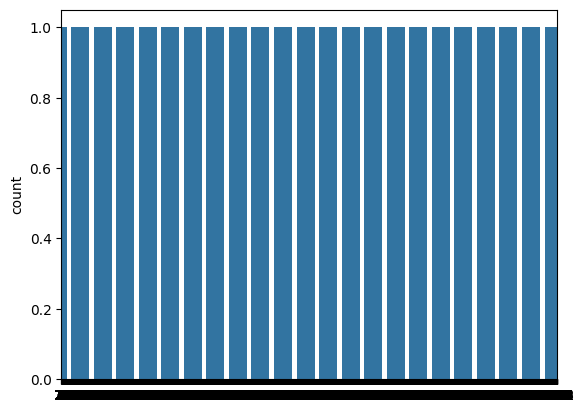

In [49]:
import seaborn as sns
sns.countplot(data['Class'])

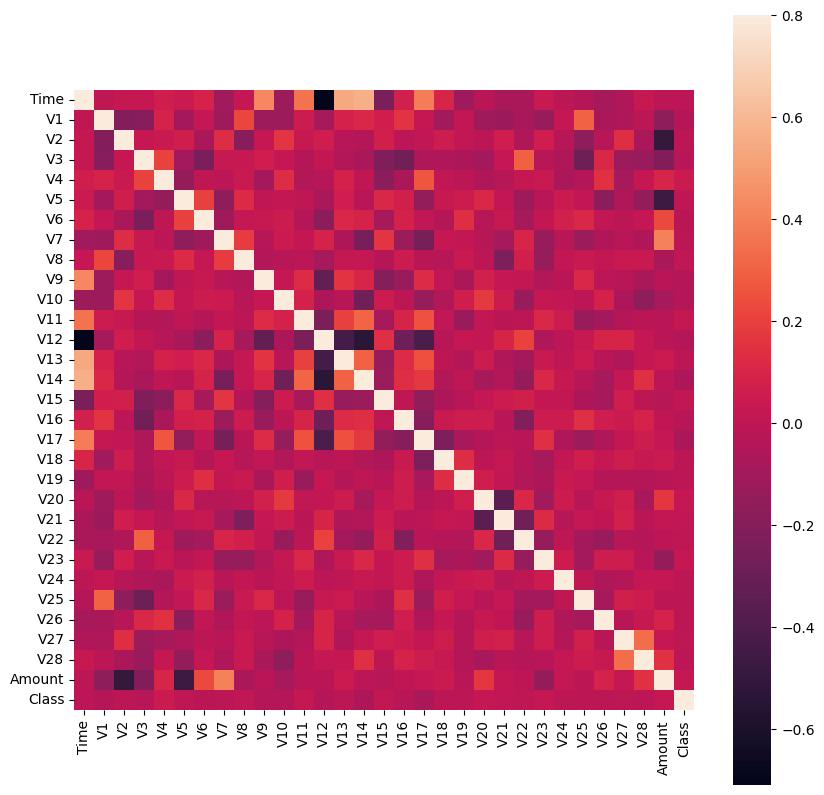

In [51]:
import matplotlib.pyplot as plt
corrmat = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat , vmax=0.8 , square=True)
plt.show()

In [52]:


X = pd.concat([X, y], axis=1)

not_fraud = X[X.Class == 0]
fraud = X[X.Class == 1]
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

upsampled = pd.concat([not_fraud, fraud_upsampled])

print(upsampled.Class.value_counts())

# Separate features and target
X = upsampled.drop('Class', axis=1)
y = upsampled['Class']

Class
0.0    5970
1.0    5970
Name: count, dtype: int64


In [53]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [55]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [56]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2528,2095,-2.826449,1.563454,1.026434,-1.101221,-1.568283,-0.681495,-0.742207,1.173205,1.009488,...,0.016417,-0.119717,-0.117611,0.037224,0.448443,0.095170,0.821778,-0.189044,-0.084416,-0.260096
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,2.410392
1507,1173,-0.870238,0.755729,1.867890,0.737844,1.000901,0.608626,0.538245,0.211662,-0.479488,...,-0.113543,0.108115,0.319207,-0.391194,-0.984388,0.383897,-0.105973,0.075643,0.113895,-0.213752
1111,862,1.174297,0.180652,0.513432,0.450884,-0.197997,-0.186938,-0.090465,0.056595,-0.281111,...,-0.086906,-0.173352,-0.484003,0.148174,0.024041,0.128743,0.105541,-0.013716,0.006335,-0.327742
167,106,-0.306311,0.991272,1.414491,0.855244,0.334284,-0.728260,1.058823,-0.469840,-0.534718,...,0.090118,0.128008,0.580329,-0.202141,0.416114,-0.271834,-0.377567,-0.113644,-0.052283,-0.210375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.908528
773,582,-0.185774,0.068493,0.985169,-1.608891,-0.182242,-1.220069,0.616142,-0.357735,-0.738038,...,0.159476,0.199537,0.800294,-0.149953,0.385025,-0.293320,-0.355963,0.220666,0.010169,-0.244510
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.338029
4969,4529,1.184167,0.066152,0.720988,1.048960,-0.385638,-0.091903,-0.303297,-0.043298,1.907172,...,-0.201851,-0.211691,-0.081422,-0.047083,0.073008,0.487745,0.429634,-0.026481,0.000958,-0.301712


In [57]:
X_train.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [58]:
X_train.shape

(8358, 30)

In [59]:
y_train

2528    0.0
623     1.0
1507    0.0
1111    0.0
167     0.0
       ... 
4920    1.0
773     0.0
541     1.0
4969    0.0
4920    1.0
Name: Class, Length: 8358, dtype: float64

In [60]:
y_train.isnull().sum()

0

In [61]:
y_train.shape

(8358,)

In [62]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 641 , random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=641, random_state=0)

In [63]:
y_pred = classifier.predict(X_test)

In [64]:
n_errors = (y_pred != y_test).sum()

In [66]:
n_errors

0

1.0


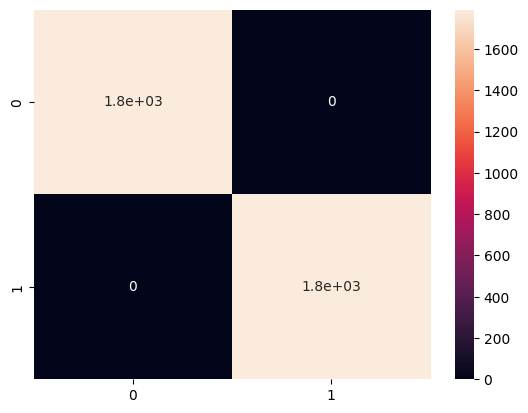

In [67]:
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)
print(accuracy_score(y_test , y_pred))


In [68]:
from sklearn.metrics import precision_score
precision_score(y_test , y_pred)

1.0

In [69]:
from sklearn.metrics import recall_score
recall_score(y_test , y_pred)

1.0

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1791
         1.0       1.00      1.00      1.00      1791

    accuracy                           1.00      3582
   macro avg       1.00      1.00      1.00      3582
weighted avg       1.00      1.00      1.00      3582

